In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from model import train_model
from data import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [130]:
data = pd.read_csv('lucas_organic_carbon/training_test/compressed_data.csv')
target = pd.read_csv('lucas_organic_carbon/target/lucas_organic_carbon_target.csv')

In [131]:
data.shape, target.shape

((9895, 100), (9895, 1))

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [133]:
rf = RandomForestClassifier(max_depth=14, n_estimators=384, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [134]:
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=14, n_estimators=384)

In [135]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns) #.sort_values(ascending=False)

feature_scores

0     0.030053
1     0.038755
2     0.035381
3     0.010256
4     0.012379
5     0.018167
6     0.041905
7     0.009178
8     0.030275
9     0.014993
10    0.014895
11    0.010307
12    0.013185
13    0.014761
14    0.009297
15    0.019466
16    0.009935
17    0.010614
18    0.016026
19    0.013340
20    0.011979
21    0.008823
22    0.013763
23    0.009215
24    0.012218
25    0.007949
26    0.008591
27    0.008510
28    0.010914
29    0.007434
30    0.010844
31    0.007511
32    0.008539
33    0.009605
34    0.009565
35    0.007781
36    0.010017
37    0.007976
38    0.008840
39    0.007493
40    0.007481
41    0.008075
42    0.008213
43    0.008654
44    0.008310
45    0.007427
46    0.008010
47    0.007818
48    0.008118
49    0.008029
50    0.007056
51    0.007332
52    0.008461
53    0.007425
54    0.007926
55    0.008870
56    0.009470
57    0.008432
58    0.006801
59    0.007257
60    0.007224
61    0.007346
62    0.007519
63    0.007799
64    0.006744
65    0.006847
66    0.00

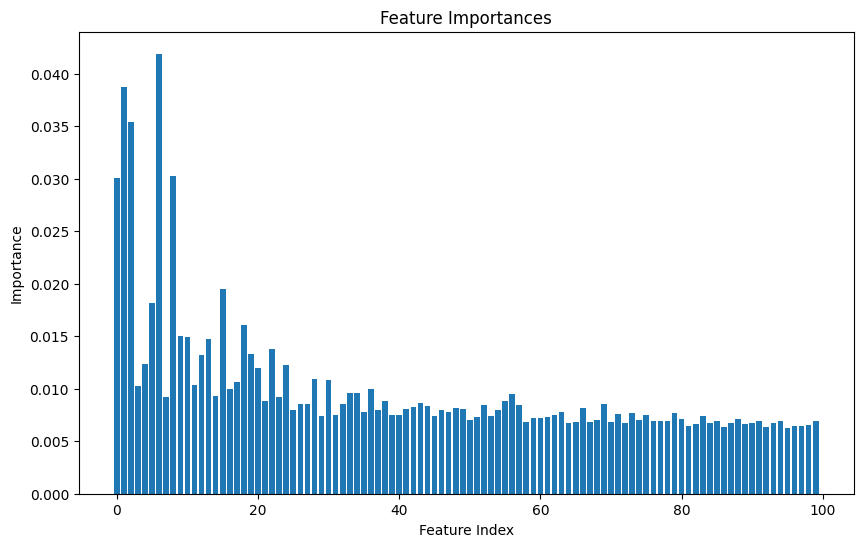

In [136]:
importances = rf.feature_importances_

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

/tmp/ipykernel_364225/1584984325.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index)


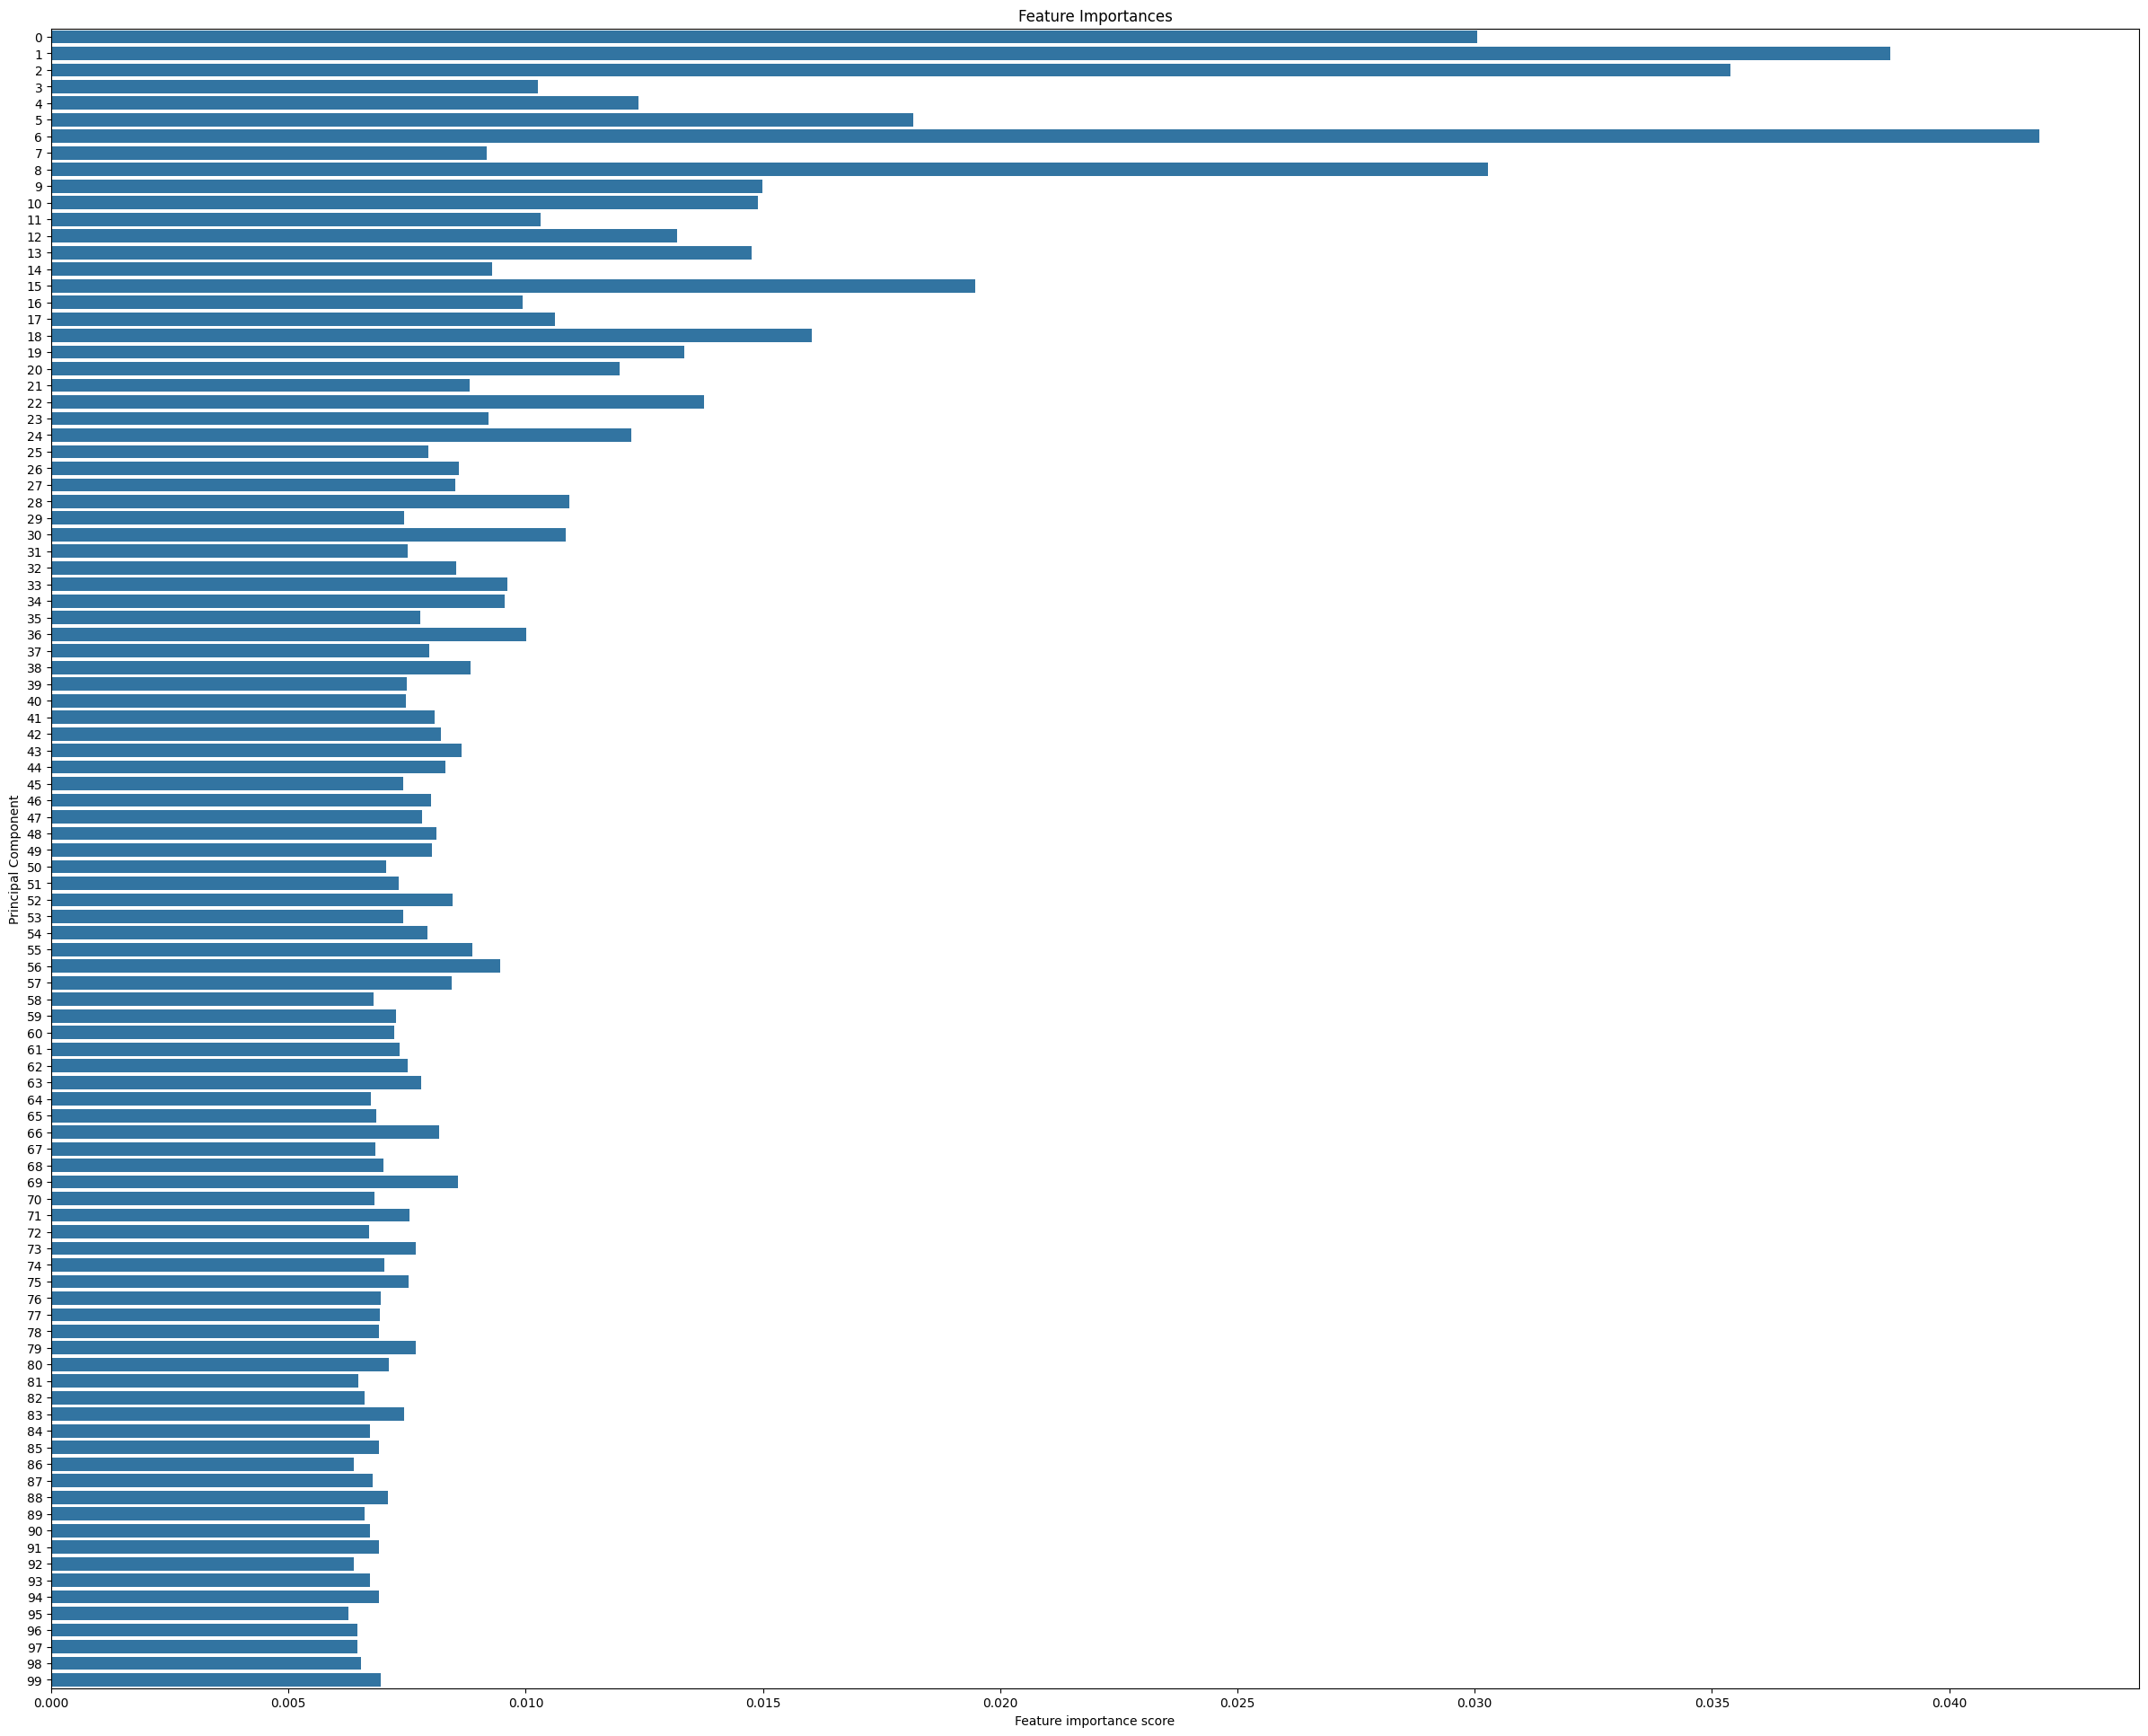

In [137]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Feature Importances")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Principal Component")
plt.show()

# interval importance

In [138]:
X_test.shape

(1979, 100)

In [139]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
6476,0.002395,0.002024,0.002217,0.001102,0.000151,-0.000216,-0.001044,-0.000427,0.000127,0.000433,...,0.000004,0.000011,-0.000006,-0.000002,0.000005,7.165150e-07,7.385657e-08,2.301348e-06,-0.000005,-2.832837e-06
1496,0.000296,-0.003359,0.000319,-0.000997,-0.000961,0.000616,-0.000124,0.000135,0.000546,-0.000408,...,0.000004,-0.000006,-0.000007,-0.000002,-0.000006,-2.613911e-06,9.498199e-07,7.354238e-07,-0.000004,-2.148209e-06
2225,0.002774,-0.001887,0.001830,0.000751,-0.000167,0.001568,0.000054,0.000155,0.000773,0.000504,...,-0.000012,0.000007,0.000004,0.000006,-0.000004,6.909427e-06,-2.580104e-06,-4.001774e-06,-0.000004,1.972640e-06
932,-0.001240,0.001163,0.000187,-0.000993,-0.000569,0.000419,-0.000333,-0.000216,-0.000003,0.000082,...,-0.000010,-0.000006,0.000003,0.000004,-0.000006,6.993639e-07,-8.526750e-07,-2.680540e-06,0.000007,4.327133e-07
7908,-0.002507,-0.003897,0.001201,-0.001727,-0.000718,0.000862,0.000608,0.000080,0.000788,-0.000361,...,-0.000002,-0.000008,-0.000003,0.000003,0.000004,-2.564162e-06,2.259271e-06,-3.901770e-06,0.000004,2.002859e-06


In [140]:
X_test.iloc[:,0]

6476    0.002395
1496    0.000296
2225    0.002774
932    -0.001240
7908   -0.002507
          ...   
1665   -0.001579
1416   -0.000088
6505   -0.006317
9366    0.008768
8730   -0.000257
Name: 0, Length: 1979, dtype: float64

In [141]:
test_data = np.arange(0, 100, 1).reshape(-1, 1)
test_data = pd.DataFrame(test_data, columns=['feature_0'])
test_data

,feature_0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [142]:
intervals = define_intervals(test_data, feature_index=0, num_intervals=5)
intervals

array([ 0. , 19.8, 39.6, 59.4, 79.2, 99. ])

In [143]:
pd.set_option('display.max_rows', 100)
pd.cut(test_data.iloc[:,0], bins=intervals, labels=intervals[:-1], include_lowest=True).astype('float')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20    19.8
21    19.8
22    19.8
23    19.8
24    19.8
25    19.8
26    19.8
27    19.8
28    19.8
29    19.8
30    19.8
31    19.8
32    19.8
33    19.8
34    19.8
35    19.8
36    19.8
37    19.8
38    19.8
39    19.8
40    39.6
41    39.6
42    39.6
43    39.6
44    39.6
45    39.6
46    39.6
47    39.6
48    39.6
49    39.6
50    39.6
51    39.6
52    39.6
53    39.6
54    39.6
55    39.6
56    39.6
57    39.6
58    39.6
59    39.6
60    59.4
61    59.4
62    59.4
63    59.4
64    59.4
65    59.4
66    59.4
67    59.4
68    59.4
69    59.4
70    59.4
71    59.4
72    59.4
73    59.4
74    59.4
75    59.4
76    59.4
77    59.4
78    59.4
79    59.4
80    79.2
81    79.2
82    79.2
83    79.2
84    79.2
85    79.2
86    79.2
87    79.2
88    79.2
89    79.2
90    79.2

In [144]:
pd.cut(test_data.iloc[:,0], bins=intervals, labels=intervals[1:], include_lowest=True).astype('float')

0     19.8
1     19.8
2     19.8
3     19.8
4     19.8
5     19.8
6     19.8
7     19.8
8     19.8
9     19.8
10    19.8
11    19.8
12    19.8
13    19.8
14    19.8
15    19.8
16    19.8
17    19.8
18    19.8
19    19.8
20    39.6
21    39.6
22    39.6
23    39.6
24    39.6
25    39.6
26    39.6
27    39.6
28    39.6
29    39.6
30    39.6
31    39.6
32    39.6
33    39.6
34    39.6
35    39.6
36    39.6
37    39.6
38    39.6
39    39.6
40    59.4
41    59.4
42    59.4
43    59.4
44    59.4
45    59.4
46    59.4
47    59.4
48    59.4
49    59.4
50    59.4
51    59.4
52    59.4
53    59.4
54    59.4
55    59.4
56    59.4
57    59.4
58    59.4
59    59.4
60    79.2
61    79.2
62    79.2
63    79.2
64    79.2
65    79.2
66    79.2
67    79.2
68    79.2
69    79.2
70    79.2
71    79.2
72    79.2
73    79.2
74    79.2
75    79.2
76    79.2
77    79.2
78    79.2
79    79.2
80    99.0
81    99.0
82    99.0
83    99.0
84    99.0
85    99.0
86    99.0
87    99.0
88    99.0
89    99.0
90    99.0

In [145]:
intervals[2]

np.float64(39.6)

In [146]:
cut_series = pd.cut(test_data.iloc[:,0], bins=intervals[1:3], labels=[intervals[1]], include_lowest=True)
cut_series = cut_series.astype('float')
cut_series.fillna(test_data.iloc[:,0], inplace=True)
cut_series

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    19.8
21    19.8
22    19.8
23    19.8
24    19.8
25    19.8
26    19.8
27    19.8
28    19.8
29    19.8
30    19.8
31    19.8
32    19.8
33    19.8
34    19.8
35    19.8
36    19.8
37    19.8
38    19.8
39    19.8
40    40.0
41    41.0
42    42.0
43    43.0
44    44.0
45    45.0
46    46.0
47    47.0
48    48.0
49    49.0
50    50.0
51    51.0
52    52.0
53    53.0
54    54.0
55    55.0
56    56.0
57    57.0
58    58.0
59    59.0
60    60.0
61    61.0
62    62.0
63    63.0
64    64.0
65    65.0
66    66.0
67    67.0
68    68.0
69    69.0
70    70.0
71    71.0
72    72.0
73    73.0
74    74.0
75    75.0
76    76.0
77    77.0
78    78.0
79    79.0
80    80.0
81    81.0
82    82.0
83    83.0
84    84.0
85    85.0
86    86.0
87    87.0
88    88.0
89    89.0
90    90.0

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    """
    Evaluate a Random Forest Classifier model.
    """
    
    # compute metrics (and save in session state)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

def define_intervals(X_test, feature_index=0, num_intervals=10):
    # Define the intervals
    min_val = X_test.iloc[:, feature_index].min()
    max_val = X_test.iloc[:, feature_index].max()
    intervals = np.linspace(min_val, max_val, num_intervals+1)
    return intervals

def interval_importance(X_test, y_test, feature_index=0, num_intervals=5):
    """
    Use transform_left parameter to map either to the left interval limit or the right interval limit (False)
    """
    # Define the intervals
    intervals = define_intervals(X_test, feature_index, num_intervals)
    
    # Initialize lists to store the differences in error metrics
    accuracy_diffs = []
    precision_diffs = []
    recall_diffs = []
    f1_diffs = []

    # Iterate over each interval
    for i in range(len(intervals) - 1):
        # Create a copy of X_test
        X_test_transformed_left = X_test.copy()
        X_test_transformed_right = X_test.copy()
        
        # Transform the interval to the left   
        cut_series = pd.cut(X_test.iloc[:, feature_index], bins=[intervals[i], intervals[i+1]], labels=[intervals[i]], include_lowest=True)
        cut_series = cut_series.astype('float')
        cut_series.fillna(test_data.iloc[:,0], inplace=True)
        X_test_transformed_left.iloc[:, feature_index] = cut_series

        # Transform the interval to the right
        cut_series = pd.cut(X_test.iloc[:, feature_index], bins=[intervals[i], intervals[i+1]], labels=[intervals[i+1]], include_lowest=True)
        cut_series = cut_series.astype('float')
        cut_series.fillna(test_data.iloc[:,0], inplace=True)
        X_test_transformed_right.iloc[:, feature_index] = cut_series

        # merge the transformed dataframes
        X_test_transformed = pd.concat([X_test_transformed_left, X_test_transformed_right], axis=0)

        # Predict using the transformed test set
        y_pred_transformed = rf.predict(X_test_transformed)
        
        # Evaluate the model
        y_test_transformed = pd.concat([y_test, y_test], axis=0)
        accuracy_transformed, precision_transformed, recall_transformed, f1_transformed = evaluate_model(y_test_transformed, y_pred_transformed)
        
        # Calculate the differences in error metrics
        accuracy_diff = accuracy - accuracy_transformed
        precision_diff = precision - precision_transformed
        recall_diff = recall - recall_transformed
        f1_diff = f1 - f1_transformed
        
        # Append the differences to the lists
        accuracy_diffs.append(accuracy_diff)
        precision_diffs.append(precision_diff)
        recall_diffs.append(recall_diff)
        f1_diffs.append(f1_diff)

    accuracy_diffs = np.array(accuracy_diffs)
    precision_diffs = np.array(precision_diffs)
    recall_diffs = np.array(recall_diffs)
    f1_diffs = np.array(f1_diffs)
    
    return accuracy_diffs, precision_diffs, recall_diffs, f1_diffs

In [148]:

# Example usage
feature_index = 5
num_intervals = 6
accuracy_diffs, precision_diffs, recall_diffs, f1_diffs = interval_importance(X_test, y_test, feature_index, num_intervals)
print("Accuracy differences:", accuracy_diffs)
print("Precision differences:", precision_diffs)
print("Recall differences:", recall_diffs)
print("F1 differences:", f1_diffs)

Accuracy differences: [0.00353714 0.00353714 0.00454775 0.         0.00353714 0.00353714]
Precision differences: [ 0.01606137  0.01606137  0.01834034 -0.02822016  0.01606137  0.01606137]
Recall differences: [0.00353714 0.00353714 0.00454775 0.         0.00353714 0.00353714]
F1 differences: [ 0.00636047  0.00636047  0.00850888 -0.00089515  0.00636047  0.00636047]
